In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input_data/train.csv')

## Q1. trainデータは何レコード(行)ありますか？

In [3]:
print('{} 行'.format(len(train)))

27128 行


## Q2.  データ内の変数が量的変数／質的変数かを調べて下さい

（以下、https://signate.jp/competitions/1/data より引用）

データ説明
学習用データ（train.csv）、検証用データ（test.csv）
予測対象となる目的変数はカラム番号"17"の定額預金申し込み有無です。ただし、検証用データには含まれません。

|カラム|ヘッダ名称|データ型|説明|
|-|-|-|-|
|0|id|int|行の通し番号|
|1|age|int|年齢|
|2|ob|varchar|職種|
|3|marital|varchar|未婚/既婚|
|4|education|varchar|教育水準|
|5|default|varchar|債務不履行があるか（yes, no）|
|6|balance|int|年間平均残高（€）|
|7|housing|varchar|住宅ローン（yes, no）|
|8|loan|varchar|個人ローン（yes, no）|
|9|contact|varchar|連絡方法|
|10|day|int|最終接触日|
|11|month|char|最終接触月|
|12|duration|int|最終接触時間（秒）|
|13|compaign|int|現キャンペーンにおける接触回数|
|14|pdays|int|経過日数：前キャンペーン接触後の日数|
|15|previous|int|接触実績：現キャンペーン以前までに顧客に接触した回数|
|16|poutcome|varchar|前回のキャンペーンの成果|
|17|y|boolean|定額預金申し込み有無（1:有り, 0:無し）|

In [4]:
'''
各列について、値の種類数をカウントしてみる。
種類が少ないものは質的変数である可能性が高いと思われる。
'''
for k in train.columns:
    print('{:10} {}'.format(k, len(train[k].unique())))

id         27128
age        77
job        12
marital    3
education  4
default    2
balance    5890
housing    2
loan       2
contact    3
day        31
month      12
duration   1424
campaign   48
pdays      491
previous   35
poutcome   4
y          2


In [5]:
'''
各列について、値の一覧を出してみる。
'''
for k in train.columns:
    print('\n{:10}\n{}'.format(k, train[k].unique()))


id        
[    1     2     3 ... 27126 27127 27128]

age       
[39 51 36 63 31 29 37 32 35 34 38 71 62 66 46 28 67 42 33 57 43 52 30 41
 56 48 60 23 40 69 49 45 55 77 54 50 53 47 25 70 44 58 26 27 59 61 22 73
 24 64 65 19 79 72 78 74 68 76 80 81 83 84 88 21 75 20 82 18 93 92 85 86
 90 87 89 95 94]

job       
['blue-collar' 'entrepreneur' 'management' 'retired' 'services'
 'technician' 'admin.' 'self-employed' 'housemaid' 'unemployed' 'unknown'
 'student']

marital   
['married' 'single' 'divorced']

education 
['secondary' 'primary' 'tertiary' 'unknown']

default   
['no' 'yes']

balance   
[ 1756  1443   436 ... -1246  5063 10451]

housing   
['yes' 'no']

loan      
['no' 'yes']

contact   
['cellular' 'unknown' 'telephone']

day       
[ 3 18 13 25 30  2  6  7 10 12 31  5  4 27 14 15 22 11 17  8  9 24 26 28
 19 20 21 23 16  1 29]

month     
['apr' 'feb' 'jan' 'jun' 'sep' 'may' 'aug' 'mar' 'jul' 'nov' 'oct' 'dec']

duration  
[ 939  172  567 ... 1823 1777 1875]

campaign  
[ 1 1

In [6]:
'''
考察

True: 質的, False: 量的
'''
pd.Series([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], index=train.columns).rename('is_categorical').astype(bool)

id            True
age          False
job           True
marital       True
education     True
default       True
balance      False
housing       True
loan          True
contact       True
day           True
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y             True
Name: is_categorical, dtype: bool

## Q3. 欠損(欠損の定義は各自で考える)はありますか？

考察:  
job, education, contact, poutcome == "unknown"  
pdays == -1  
poutcome == "other" は？  

In [7]:
'''
各列について、値がNaNとなっている要素の数を数えてみる。

> 一つもない
'''
train.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
'''
各列の値一覧を再度見てみる（Q2と同じもの）。

> "unknown"という値を持つ列がいくつかある。これは欠損値としてよさそう。
> また、poutcome列には"other"もある。
'''
for k in train.columns:
    print('\n{:10}\n{}'.format(k, train[k].unique()))


id        
[    1     2     3 ... 27126 27127 27128]

age       
[39 51 36 63 31 29 37 32 35 34 38 71 62 66 46 28 67 42 33 57 43 52 30 41
 56 48 60 23 40 69 49 45 55 77 54 50 53 47 25 70 44 58 26 27 59 61 22 73
 24 64 65 19 79 72 78 74 68 76 80 81 83 84 88 21 75 20 82 18 93 92 85 86
 90 87 89 95 94]

job       
['blue-collar' 'entrepreneur' 'management' 'retired' 'services'
 'technician' 'admin.' 'self-employed' 'housemaid' 'unemployed' 'unknown'
 'student']

marital   
['married' 'single' 'divorced']

education 
['secondary' 'primary' 'tertiary' 'unknown']

default   
['no' 'yes']

balance   
[ 1756  1443   436 ... -1246  5063 10451]

housing   
['yes' 'no']

loan      
['no' 'yes']

contact   
['cellular' 'unknown' 'telephone']

day       
[ 3 18 13 25 30  2  6  7 10 12 31  5  4 27 14 15 22 11 17  8  9 24 26 28
 19 20 21 23 16  1 29]

month     
['apr' 'feb' 'jan' 'jun' 'sep' 'may' 'aug' 'mar' 'jul' 'nov' 'oct' 'dec']

duration  
[ 939  172  567 ... 1823 1777 1875]

campaign  
[ 1 1

In [9]:
'''
各列について、値の最大値と最小値を見てみる。

> pdays列に-1がある。欠損値と思われる。
> 前キャンペーンでの接触がない人は-1か？
> 量的変数なので、-1として入っていると不都合があるのでNaNなどにして扱いたい。

> age, day, campaign, previousなどは妥当に見える。
'''
train.agg(['max', 'min'])

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
max,27128,95,unknown,single,unknown,yes,102127,yes,yes,unknown,31,sep,4918,63,871,275,unknown,1
min,1,18,admin.,divorced,primary,no,-6847,no,no,cellular,1,apr,0,1,-1,0,failure,0


In [10]:
'''
pdays < 0 であるデータは27128件中22146件もあり、そのすべてが pdays == -1
'''
print((train.pdays < 0).sum())
print(train.pdays[train.pdays < 0].unique())

22146
[-1]


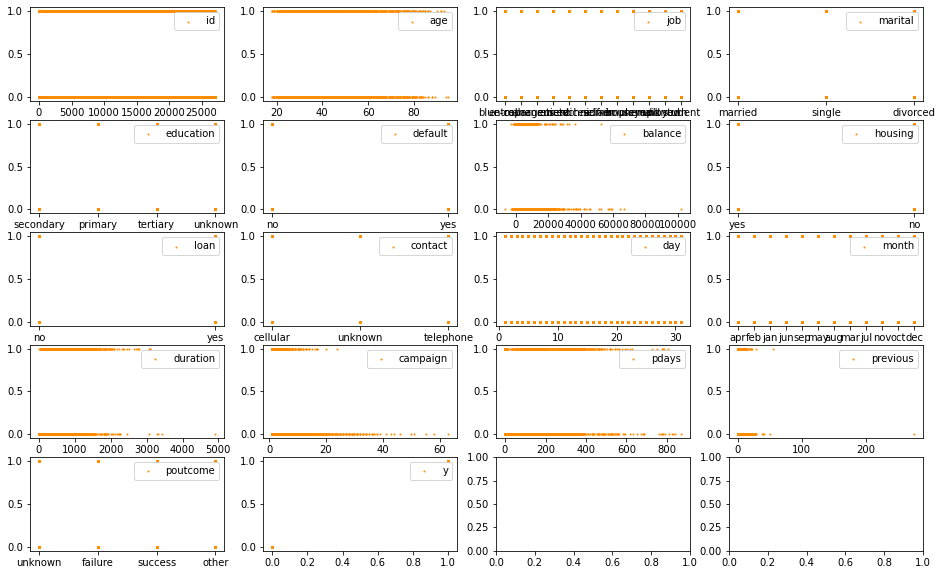

In [11]:
'''
横軸を各列の値、縦軸をy列としてざっとプロットしてみる。
量的変数はそれらしく分布しているように見える。
'''
n = len(train.columns)
nc = 4
nr = -int(-n//nc)
fig, ax = plt.subplots(nr, nc, figsize=(nc*4, nr*2))
for i in range(n):
    a = ax.ravel()[i]
    a.scatter(x=train[train.columns[i]], y=train.y, s=1, color='darkorange', label=train.columns[i])
    a.legend()

plt.show()

## Q4. balanceが10,000以上の人は何%程度いますか？

In [12]:
q4 = (train.balance >= 10000).rename('Q4')
answer = q4.sum() / q4.count() * 100
print('{} %'.format(answer.round(1)))

1.8 %


## Q5. contactがcellularの人は何%程度いますか？

In [13]:
q5 = (train.contact == "cellular").rename('Q5')
answer = q5.sum() / q5.count() * 100
print('{} %'.format(answer.round(1)))

64.8 %


## Q6. Q4またはQ5の人の申込率(y=1の割合)はどの程度ですか？


題意がよくわからない（Q4==TrueとQ5==Trueのyをそれぞれ出すのか、(Q4 or Q5)==Trueのyを出すのか…）ので全部出してみる。

どれも14～15%

In [14]:
q64 = train[q4].y
q64.value_counts(normalize=True)

0    0.856855
1    0.143145
Name: y, dtype: float64

In [15]:
q65 = train[q5].y
q65.value_counts(normalize=True)

0    0.850455
1    0.149545
Name: y, dtype: float64

In [16]:
q6x = train[q4 | q5].y
q6x.value_counts(normalize=True)

0    0.851238
1    0.148762
Name: y, dtype: float64

## Q7. Q6の答えを集計表もしくはグラフで可視化してください

In [17]:
'''
各True/Falseの組み合わせに該当する人の中での、y==1の人の割合の表
'''
y_prop_cross = (train.y.groupby([q4, q5]).sum() / train.y.groupby([q4, q5]).count()).unstack('Q5')
y_prop_cross

Q5,False,True
Q4,,
False,0.057052,0.148924
True,0.058824,0.180758


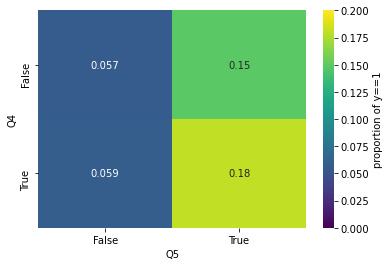

In [18]:
'''
ヒートマップで見てみる。
'''
sns.heatmap(y_prop_cross, annot=True, vmin=0, vmax=0.2, cbar_kws={'label': 'proportion of y==1'}, cmap='viridis')

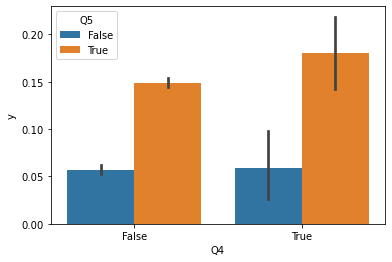

In [19]:
'''
棒グラフにしてみる。
黒い棒はエラーバー。

Q5のTrue/Falseはyに効いていそうだが、Q4のTrue/Falseはあまり効いていなそう。
'''
sns.barplot(x=q4, y=train.y, hue=q5)